## Differential Privacy

Let's take the same dataset we took for pseudonimisation. <br>
Suppose this data is requested by reserachers in the social science department.<br> 
They want to analyse the mental health of the undergraduates. <br>

-  Applying psuedonimysation is not privacy preserving enough.<br>
-  K-anonymity reduces individual level query analysis (because they are grouped).<br>
-  And also it still has the vulnerability to linkage attacks. <br>
-  We will apply differential privacy to the dataset query results. <br>
-  In this way, we also do not need to share the dataset with outsiders. <br>

In [1]:
#install only if you have not installed before
#If you have problems with !pip use !pip3 or %pip and recheck
#%pip install pandas
#%pip install numpy
#!pip3 install matplotlib
#!pip3 install seaborn

#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

#### The assignment 2 is using a different version of the counseling_dataset.csv

Please use the correct dataset from Assignment 2 in Canvas for the assignment (not for this exercise)

In [2]:
#Load the dataset
data = pd.read_csv('counseling_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Full Name          500 non-null    object
 1   Student ID         500 non-null    object
 2   Email              500 non-null    object
 3   Preferred Email    500 non-null    object
 4   Mobile Number      500 non-null    int64 
 5   ZIP                500 non-null    int64 
 6   DoB                500 non-null    object
 7   Sessions Offered   500 non-null    int64 
 8   Sessions Attended  500 non-null    int64 
 9   Gender             500 non-null    object
 10  Ethnicity          500 non-null    object
 11  Study Field        500 non-null    object
 12  Sexual Abuse       500 non-null    int64 
 13  Suicidal           500 non-null    int64 
 14  Self Harm          500 non-null    int64 
 15  Anxiety            500 non-null    int64 
 16  Depression         500 non-null    int64 
 1

In [3]:
copy_data = data.copy()

# Let's take a look at the dataset
data

,Full Name,Student ID,Email,Preferred Email,Mobile Number,ZIP,DoB,Sessions Offered,Sessions Attended,Gender,...,Self Harm,Anxiety,Depression,Eating Disorder,Health,Risk to Others,Anger,Alcohol,Drugs,Smoking
0,David Green-Pickering,dgre6789,dgre6789@university.edu,david366green-pickering@outlook.com,2736225,2031,3/01/1999,19,8,Female,...,0,1,1,1,1,1,0,0,1,0
1,Suzanne Pearce,spea6271,spea6271@university.edu,suzannepearce@icloud.com,2726234,8599,12/09/1986,0,0,Male,...,1,0,0,1,1,1,0,0,0,0
2,Julie Gibson-Forrest,jgib9592,jgib9592@university.edu,julie35gibson-forrest@outlook.com,2784005,9337,15/03/1996,6,5,Female,...,0,1,0,1,1,1,1,0,1,0
3,Hannah Barnes,hbar4405,hbar4405@university.edu,hannah848barnes@outlook.com,2232137,8698,8/08/1997,0,0,Other,...,0,1,0,1,1,1,0,1,0,0
4,Maia Hansen,mhan6405,mhan6405@university.edu,maiahansen@yahoo.com,2197017,2381,1/02/1994,20,9,Male,...,1,1,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Pauline Howell,phow2946,phow2946@university.edu,pauline333howell@outlook.com,2732191,5397,21/10/2000,1,1,Other,...,1,0,0,1,0,0,1,1,1,0
496,Hamish Paterson,hpat2066,hpat2066@university.edu,hamish452paterson@outlook.com,2794832,5354,9/03/1992,10,8,Male,...,1,1,0,0,1,0,0,0,1,0
497,Natasha Butler,nbut900,nbut900@university.edu,natashabutler@yahoo.com,2289142,6978,20/10/1996,1,0,Female,...,1,1,0,0,1,0,0,1,0,0
498,Amy Watt-Parkes,awat7941,awat7941@university.edu,amy_watt-parkes@yahoo.com,2722575,5778,12/10/1991,8,1,Male,...,0,1,1,0,0,1,0,0,1,0


### Preprocessing

The researchers wants to analyse:
- The spread of psychological issues with age, ethnicity, gender, study field, and session counts
    
In real life...What columns can you get rid of?
- Not sure? You can always ask the external party what they exactly need to analyse. 
- And also you can refuse to share some columns..

In [4]:
def remove_columns():
    data.drop(columns = ['Full Name', 'Student ID', 'Email', 'Preferred Email', 'Mobile Number', 'ZIP'], inplace = True)

def calculate_age():
    # Convert the 'DoB' column to datetime format
    data['DoB'] = pd.to_datetime(data['DoB'], format='%d/%m/%Y')
    
    today = datetime.today()
    data['DoB'] = data['DoB'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)))
    data.rename(columns={"DoB": "Age"}, inplace = True)

# preprocess the data
def preprocess_data():
    remove_columns()
    calculate_age()

In [5]:
#preprocess the dataset
preprocess_data()
data

,Age,Sessions Offered,Sessions Attended,Gender,Ethnicity,Study Field,Sexual Abuse,Suicidal,Self Harm,Anxiety,Depression,Eating Disorder,Health,Risk to Others,Anger,Alcohol,Drugs,Smoking
0,26,19,8,Female,Asian,Creative Arts,1,0,0,1,1,1,1,1,0,0,1,0
1,38,0,0,Male,Asian,Arts,0,1,1,0,0,1,1,1,0,0,0,0
2,28,6,5,Female,Asian,Business,0,1,0,1,0,1,1,1,1,0,1,0
3,27,0,0,Other,Asian,Education and Social Work,0,0,0,1,0,1,1,1,0,1,0,0
4,31,20,9,Male,Maori,Business,1,0,1,1,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24,1,1,Other,Asian,Law,1,1,1,0,0,1,0,0,1,1,1,0
496,32,10,8,Male,Asian,Arts,0,0,1,1,0,0,1,0,0,0,1,0
497,28,1,0,Female,Pacific,Education and Social Work,0,0,1,1,0,0,1,0,0,1,0,0
498,33,8,1,Male,European,Science,1,0,0,1,1,0,0,1,0,0,1,0


### Generating Differntial Private Result

How does laplace ditrubution looks like

<font color="red">F</font>(D) = <font color="green">f</font>(d) + random laplace noise <br>
noisy_result = real_result + random laplace noise

**Query1:** How many students are above 24 years old?

In [15]:
real_result = len(data[data['Age'] > 24])
real_result

362

In [9]:
sensitivity_count = 1
epsilon_count = 0.1

In [10]:
def get_noisy_result(real_result, sensitivity, epsilon):
    noisy_result = real_result + np.random.laplace(loc=0, scale=sensitivity/epsilon)
    return noisy_result

In [14]:
get_noisy_result(real_result, sensitivity_count, epsilon_count)

365.08194860328814

##### Change the epsilon to 2 and see the noisy  result

In [16]:
get_noisy_result(real_result, sensitivity_count, 2)

361.98851507978844

##### Change the epsilon to 0.01 and see the noisy  result

In [17]:
get_noisy_result(real_result, sensitivity_count, 0.01)

387.8877164024786

#### Question 1

What did you observe when you change the epsilon?

<font color="blue"> Write your answer </font>

##### Run get_noisy_result() 20 times and print the outputs

In [18]:
def get_multiple_noisy_values(real_result, sensitivity, epsilon, times):
    values = []
    for _ in range(times):
        values.append(get_noisy_result(real_result, sensitivity,epsilon))
    
    return values

In [19]:
get_multiple_noisy_values(real_result, sensitivity_count, epsilon_count, 20)

[376.1972707718033,
 358.29335852839273,
 381.87403487967265,
 372.09459117361996,
 360.6664099985505,
 370.0739732161303,
 375.1703197918015,
 354.19436118091426,
 360.9917755289729,
 379.05567013610147,
 362.2649804231147,
 370.97118297157715,
 367.1094204447532,
 344.3461408926622,
 373.9661556301809,
 368.3625267074956,
 359.7707088260564,
 359.28128896665123,
 375.97696531237784,
 369.32630065399536]

##### Draw the <font color="red">F</font>(D) graph for Query 1

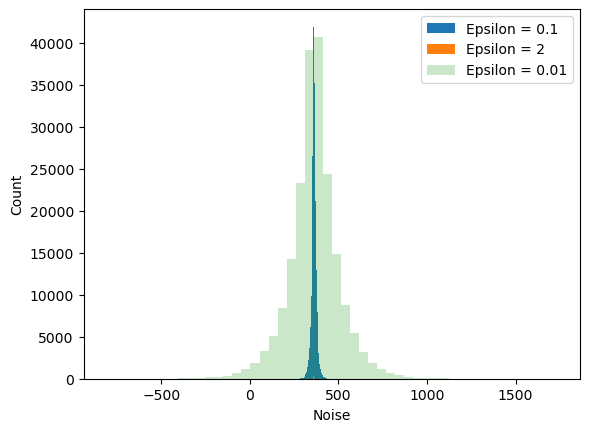

In [36]:
noiseList = get_multiple_noisy_values(real_result, sensitivity_count, epsilon_count, 200000)
noiseList2 = get_multiple_noisy_values(real_result, sensitivity_count, 2, 200000)
noiseList3 = get_multiple_noisy_values(real_result, sensitivity_count, 0.01, 200000)

plt.hist(noiseList, bins=50, label = 'Epsilon = 0.1');
plt.hist(noiseList2, bins=50, label = 'Epsilon = 2');
plt.hist(noiseList3, bins=50, alpha=0.25,label = 'Epsilon = 0.01');

plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Noisy Result for the Neighbour

- After some time, Jason ask the university to remove his data from the counselling sessions
- So now the dataset size is one record less
- Jason's DoB 21/06/1998 = 26

In [22]:
jason_index = copy_data[copy_data['Full Name'] == "Jason Read-Joe"].index
neighbour = data.drop(jason_index)

In [23]:
real_result_neighbour = len(neighbour[neighbour['Age'] > 24])
real_result_neighbour

361

In [24]:
sensitivity_count_neighbour = 1
epsilon_count_neighbour = 0.1

In [29]:
get_noisy_result(real_result_neighbour, sensitivity_count_neighbour, epsilon_count_neighbour)

352.86954856820813

##### Draw the <font color="red">F</font>(D) graph for both datasets

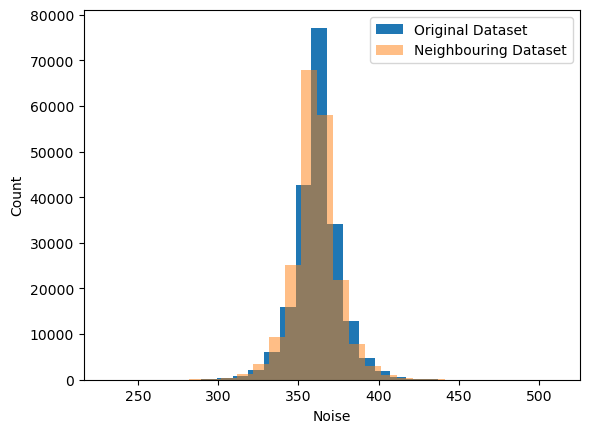

In [37]:
noiseList4 = get_multiple_noisy_values(real_result_neighbour, sensitivity_count_neighbour, epsilon_count_neighbour, 200000)

plt.hist(noiseList, bins=25, label = 'Original Dataset');
plt.hist(noiseList4, bins=25,alpha=0.5, label = 'Neighbouring Dataset');

plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend()
plt.show()

# Clipping

**Query2:** What is the total age of students that have anxiety?

In [38]:
real_age_anxiety = data[data['Anxiety'] == 1]['Age'].sum()
real_age_anxiety

6867

What is the sensivity of this query?

some of the neighbouring datasets....
- Adding a new student: with anxiety => total age anxiety depends on that student's age
- Adding a new student: no anxiety => total age anxiety doesn't change
- Removing a student: with anxiety =>total age anxiety depends on that student's age
<br>.....................

It is hard to tell the sensivity of queries that does not have fixed lower or upper bounds of the query results

##### Query 2 Sensitivity

###### Find the Upper limit of Age - Slide 29

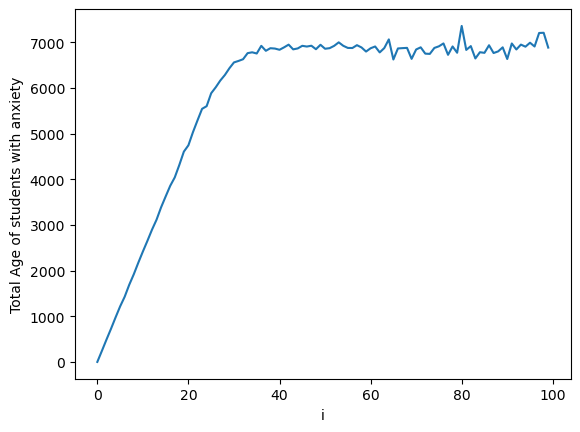

In [43]:
results = []

for i in range(100):
    age_sum = data[data['Anxiety'] == 1]['Age'].clip(lower = 0, upper = i).sum()
    # increase the epsilon and observe how the chart changes when the scale changes
    noisy_age_sum = age_sum + np.random.laplace(loc=0, scale= i/0.9)

    results.append(noisy_age_sum)

plt.plot(results)
plt.xlabel('i')
plt.ylabel('Total Age of students with anxiety');

In [44]:
sensitivty_age_anxiety = 40 - 0

In [45]:
noisy_age_anxiety = real_age_anxiety + np.random.laplace(loc=0 , scale= sensitivty_age_anxiety/0.1)
noisy_age_anxiety

7726.210189253599